In [57]:
!pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import LinearSegmentedColormap
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import LinearSegmentedColormap 




# Cargar el archivo CSV
file_path = r"C:\Users\shara\OneDrive - Universidad Autónoma Latinoamericana\7mo semestre\Ciencia de datos II\Churn_Modelling.csv"
df = pd.read_csv(file_path)

# Mostrar primeras filas
df.head()



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Diccionario de datos

| **Nombre de la Variable** | **Descripción**                                                                             |
| ------------------------- | ------------------------------------------------------------------------------------------- |
| `RowNumber`               | Número de fila, simplemente el índice del registro (de 1 a 10000).                          |
| `CustomerId`              | Identificador único del cliente en el banco.                                                |
| `Surname`                 | Apellido del cliente.                                                                       |
| `CreditScore`             | Puntuación de crédito del cliente (valor numérico, mayor es mejor).                         |
| `Geography`               | País del cliente (`France`, `Germany`, `Spain`).                                            |
| `Gender`                  | Sexo del cliente (`Male`, `Female`).                                                        |
| `Age`                     | Edad del cliente.                                                                           |
| `Tenure`                  | Años que el cliente ha permanecido en el banco.                                             |
| `Balance`                 | Saldo que el cliente tiene en su cuenta bancaria.                                           |
| `NumOfProducts`           | Número de productos bancarios que el cliente utiliza.                                       |
| `HasCrCard`               | Si el cliente tiene tarjeta de crédito (1 = sí, 0 = no).                                    |
| `IsActiveMember`          | Si el cliente es miembro activo (1 = sí, 0 = no).                                           |
| `EstimatedSalary`         | Salario estimado del cliente.                                                               |
| `Exited`                  | Si el cliente dejó el banco (1 = sí, 0 = no). Variable objetivo en aprendizaje supervisado. |



In [4]:
# Filtrar las variables seleccionadas
df_numerico = df[[
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'HasCrCard',
    'IsActiveMember',
    'EstimatedSalary'
]]

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerico)

# Convertir a DataFrame para facilidad de uso
df_scaled = pd.DataFrame(df_scaled, columns=df_numerico.columns)

# Mostrar primeras filas del dataset estandarizado
df_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


#### Aplicar PCA

In [39]:


# Selección de variables numéricas
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

# Escalar (estandarizar) las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)

# Obtener varianza explicada
explained_variance = pca.explained_variance_ratio_


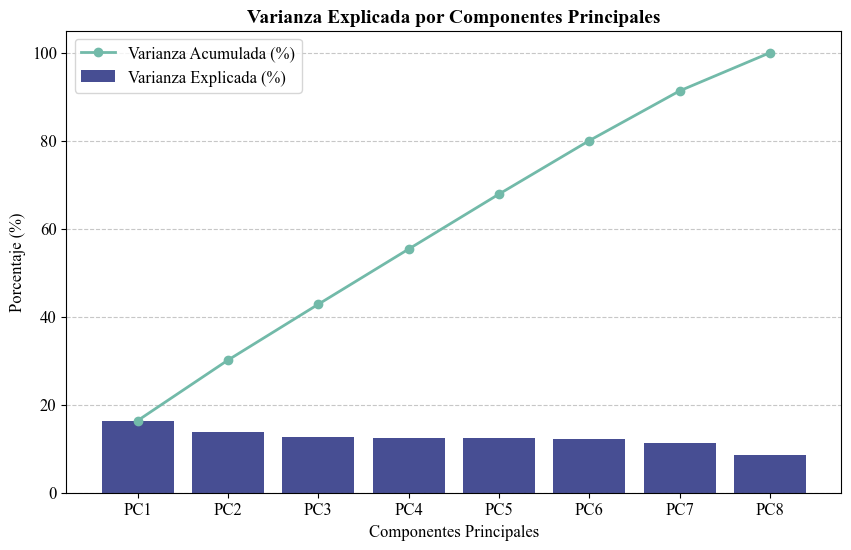

In [41]:

# Colores 
colors = ['#474E93', '#7E5CAD', '#72BAA9', '#D5E7B5']

plt.figure(figsize=(10,6))

# Graficar varianza explicada
plt.bar(pca_table['Componente Principal'], pca_table['Varianza Explicada (%)'], color=colors[0], label='Varianza Explicada (%)')

# Graficar varianza acumulada
plt.plot(pca_table['Componente Principal'], pca_table['Varianza Acumulada (%)'], color=colors[2], marker='o', linestyle='-', linewidth=2, label='Varianza Acumulada (%)')

# Ajustar fuentes
plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)

plt.xlabel('Componentes Principales', fontname='Times New Roman', fontsize=12)
plt.ylabel('Porcentaje (%)', fontname='Times New Roman', fontsize=12)
plt.title('Varianza Explicada por Componentes Principales', fontname='Times New Roman', fontsize=14, fontweight='bold')

plt.legend(prop={'family':'Times New Roman', 'size':12})
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


#### Componentes principales y visualización

In [14]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)


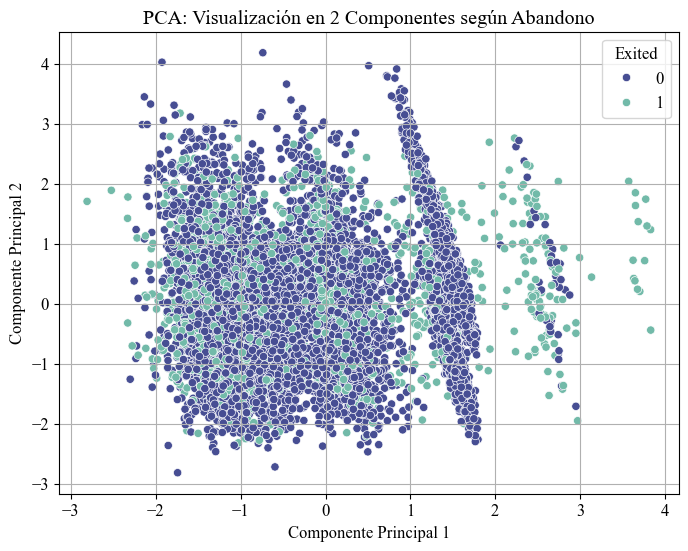

In [42]:
# Definir variable objetivo y DataFrame con componentes principales
y = df['Exited']  
df_pca = pd.DataFrame(X_pca_2, columns=['PC1', 'PC2'])
df_pca['Exited'] = y.values

# Definir colores personalizados
colors = ['#474E93', '#72BAA9']  

# Visualización con scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Exited', palette=colors)
plt.title('PCA: Visualización en 2 Componentes según Abandono')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


#### Obtener loadings

In [20]:
loadings = pd.DataFrame(
    pca.components_[:2].T,  
    columns=['PC1', 'PC2'],
    index=X.columns
)
print(loadings)



                      PC1       PC2
CreditScore      0.014366  0.166989
Age             -0.136392  0.594261
Tenure           0.065711 -0.286960
Balance         -0.697772 -0.077656
NumOfProducts    0.698188  0.077557
HasCrCard        0.049811 -0.198470
IsActiveMember  -0.000220  0.685261
EstimatedSalary  0.006314 -0.124916


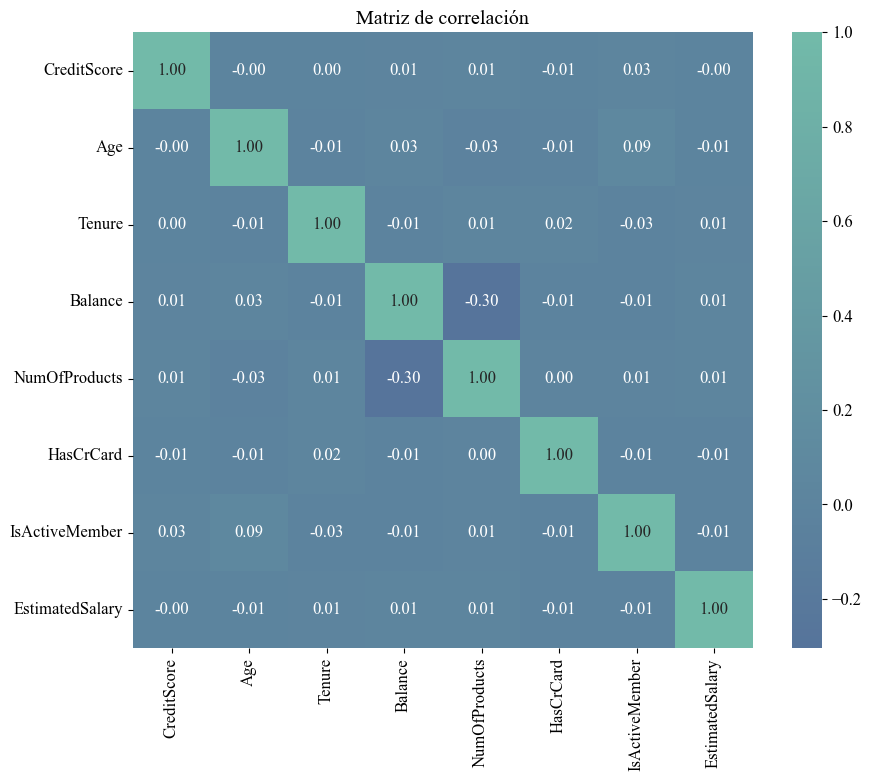

                 Max Correlación Absoluta con otra variable  \
Age                                                0.085472   
EstimatedSalary                                    0.014204   
CreditScore                                        0.025651   
Balance                                            0.304180   
NumOfProducts                                      0.304180   
Tenure                                             0.028362   
IsActiveMember                                     0.085472   
HasCrCard                                          0.022583   

                 Importancia Random Forest  
Age                               0.247400  
EstimatedSalary                   0.169880  
CreditScore                       0.165742  
Balance                           0.149260  
NumOfProducts                     0.128954  
Tenure                            0.082147  
IsActiveMember                    0.040844  
HasCrCard                         0.015772  


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import LinearSegmentedColormap

# Crear colormap personalizado con tus dos colores
colors = ['#474E93', '#72BAA9']
custom_cmap = LinearSegmentedColormap.from_list("custom", colors)

# Matriz de correlación
corr = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap=custom_cmap, center=0, fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

# Entrenar Random Forest para obtener importancia de variables
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)

# Crear tabla con máxima correlación absoluta con otra variable y su importancia
max_corr = corr.abs().apply(lambda x: x.drop(x.name).max())  # máxima correlación con otra

tabla = pd.DataFrame({
    'Max Correlación Absoluta con otra variable': max_corr,
    'Importancia Random Forest': importances
})

# Ordenar por importancia
tabla = tabla.sort_values(by='Importancia Random Forest', ascending=False)

# Mostrar tabla
print(tabla)



Se aplicó un criterio combinado de selección basado en la matriz de correlación y la importancia de características obtenida mediante Random Forest. No se eliminaron variables por alta correlación, dado que la máxima correlación entre variables fue moderada (0.304). Sin embargo, se eliminaron variables con baja importancia para la predicción, específicamente HasCrCard, que presentó una importancia menor a 0.02. La variable IsActiveMember se mantuvo por estar cerca del umbral de importancia.

#### Aplicación de k-means al dataset reducido

K=2 -> Inertia: 38362541844781.30, Silhouette Score: 0.467
K=3 -> Inertia: 22817573808207.04, Silhouette Score: 0.478
K=4 -> Inertia: 13690592623959.57, Silhouette Score: 0.508
K=5 -> Inertia: 10842026853077.26, Silhouette Score: 0.459
K=6 -> Inertia: 9026703075811.04, Silhouette Score: 0.446


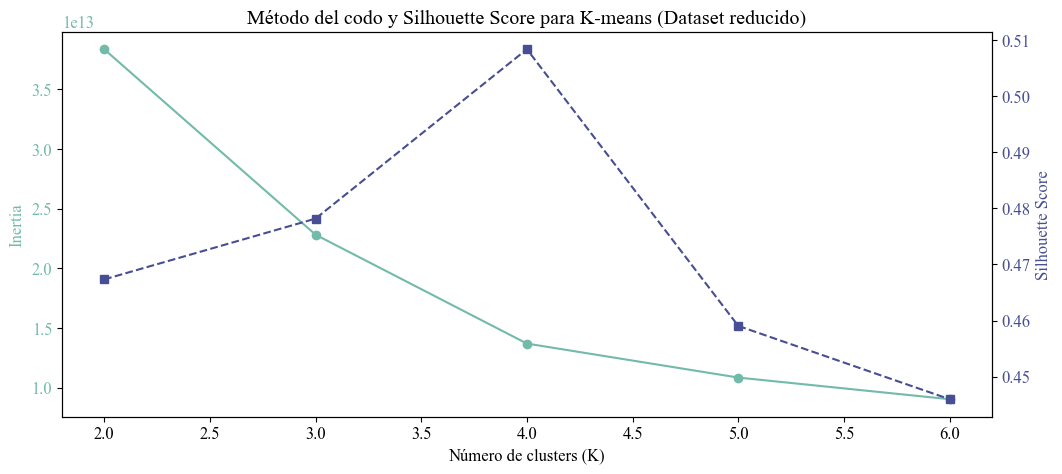

In [55]:

# 1. Crear dataset reducido
X_reduced = X.drop(columns=['HasCrCard'])

# 2. Aplicar K-means para k=2 a 6
inertia = []
silhouette = []

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)
    
    inertia.append(kmeans.inertia_)
    
    labels = kmeans.labels_
    sil_score = silhouette_score(X_reduced, labels)
    silhouette.append(sil_score)
    print(f'K={k} -> Inertia: {kmeans.inertia_:.2f}, Silhouette Score: {sil_score:.3f}')

# 3. Graficar método del codo y silhouette
fig, ax1 = plt.subplots(figsize=(12,5))

color = '#72BAA9'
ax1.set_xlabel('Número de clusters (K)')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(range(2,7), inertia, 'o-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = '#474E93'  
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(range(2,7), silhouette, 's--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Método del codo y Silhouette Score para K-means (Dataset reducido)')
plt.show()


#### Análisis Detallado del Clustering y Visualización en PCA (para el dataset de Selección de Características)

In [46]:
kmeans_final = KMeans(n_clusters=4, random_state=42)
clusters = kmeans_final.fit_predict(X_reduced)

# Agregar la etiqueta de cluster al DataFrame original para análisis posterior
df_clusters = X_reduced.copy()
df_clusters['Cluster'] = clusters


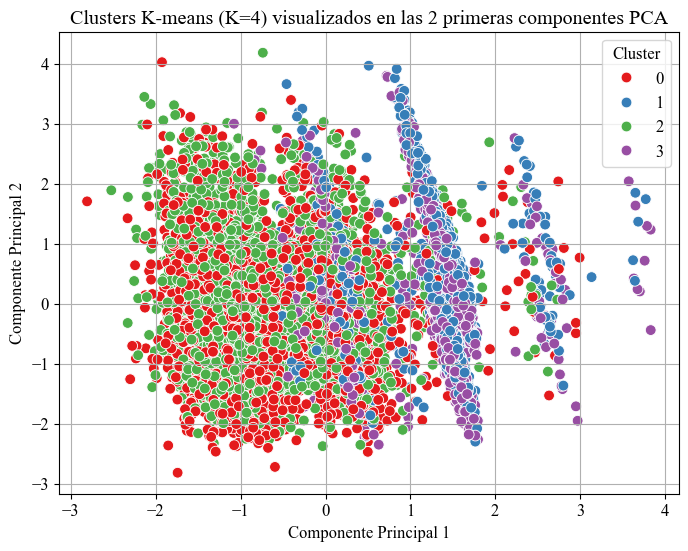

In [26]:
df_pca_clusters = pd.DataFrame(X_pca_2, columns=['PC1', 'PC2'])
df_pca_clusters['Cluster'] = clusters

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca_clusters, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=60)
plt.title('Clusters K-means (K=4) visualizados en las 2 primeras componentes PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [27]:
cluster_summary = df_clusters.groupby('Cluster').mean()
print(cluster_summary)


         CreditScore        Age    Tenure        Balance  NumOfProducts  \
Cluster                                                                   
0         650.749760  38.971200  5.002880  121890.983670       1.402560   
1         650.003655  38.550914  5.051697    2321.907274       1.770757   
2         651.704753  39.417318  4.961263  121944.084440       1.367513   
3         648.782309  38.409958  5.073623    2590.513284       1.762182   

         IsActiveMember  EstimatedSalary  
Cluster                                   
0              0.513280    149840.931965  
1              0.524804     49807.452052  
2              0.513346     50582.690371  
3              0.511123    149299.889258  


1. Clusters 0 y 2 tienen balances altos, pero difieren en el salario estimado (cluster 0 alto, cluster 2 bajo).
2. Clusters 1 y 3 tienen balances bajos, pero se diferencian en salario estimado (cluster 3 alto, cluster 1 bajo).
3. La variable NumOfProducts y IsActiveMember se mantienen similares entre clusters.
4. La edad y el CreditScore no presentan grandes diferencias.

In [30]:
df['Cluster'] = kmeans.labels_

# Tasa de abandono por cluster
abandono_por_cluster = df.groupby('Cluster')['Exited'].mean()
print(abandono_por_cluster)


Cluster
0    0.249142
1    0.132134
2    0.227799
3    0.152156
4    0.242584
5    0.150271
Name: Exited, dtype: float64


El cluster 0, con una tasa de abandono del 24.9%, está conformado principalmente por clientes de mediana edad, con altos saldos y sueldos estimados, pero con pocos productos contratados y moderado nivel de actividad.

#### Comparación de las tres opciones

Evaluación para: Original
K=2 -> Inertia: 38362541846857.94, Silhouette Score: 0.467
K=3 -> Inertia: 22817573810283.83, Silhouette Score: 0.478
K=4 -> Inertia: 13690592626035.89, Silhouette Score: 0.508
K=5 -> Inertia: 10842026855153.57, Silhouette Score: 0.459
K=6 -> Inertia: 9026703077886.41, Silhouette Score: 0.446
Evaluación para: PCA (2 componentes)
K=2 -> Inertia: 14305.01, Silhouette Score: 0.382
K=3 -> Inertia: 9322.15, Silhouette Score: 0.393
K=4 -> Inertia: 7077.44, Silhouette Score: 0.373
K=5 -> Inertia: 5692.24, Silhouette Score: 0.388
K=6 -> Inertia: 4759.09, Silhouette Score: 0.400
Evaluación para: Reducción por correlación
K=2 -> Inertia: 38362541844781.30, Silhouette Score: 0.467
K=3 -> Inertia: 22817573808207.04, Silhouette Score: 0.478
K=4 -> Inertia: 13690592623959.57, Silhouette Score: 0.508
K=5 -> Inertia: 10842026853077.26, Silhouette Score: 0.459
K=6 -> Inertia: 9026703075811.04, Silhouette Score: 0.446
Evaluación para: Original
K=2 -> Inertia: 38362541846857.94,

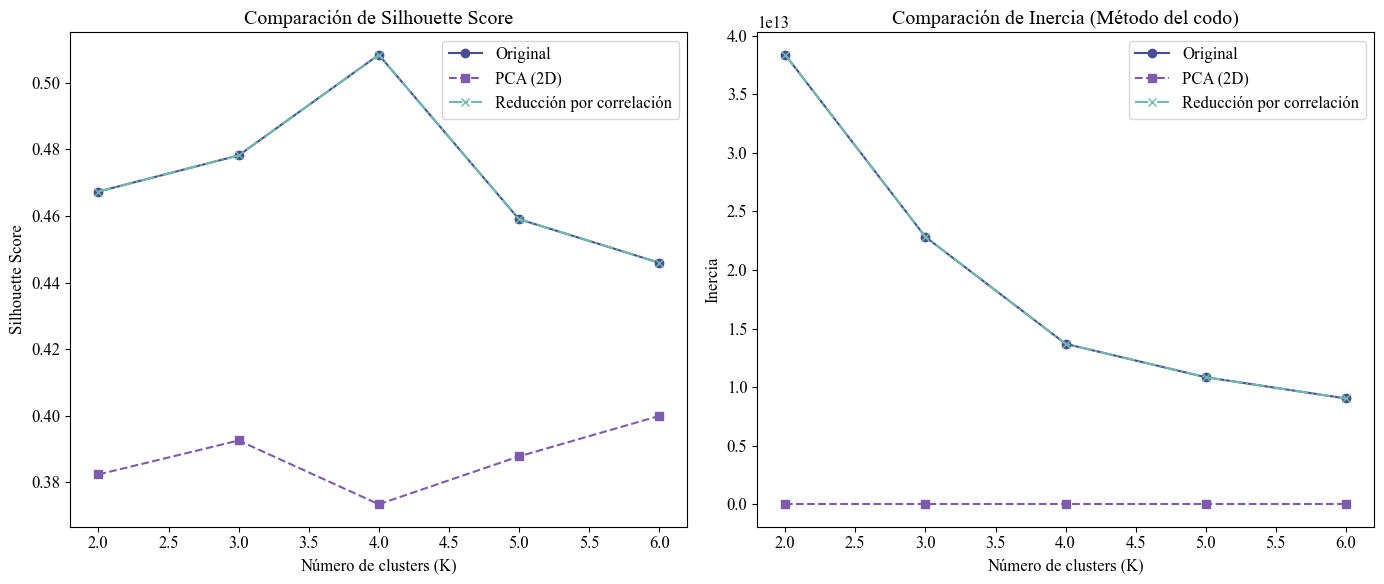

In [59]:

# 1. Dataset original
X_original = X.copy()

# 2. Dataset reducido por PCA a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Dataset reducido por selección de variables
# (en este ejemplo eliminamos la variable 'HasCrCard' por alta correlación)
X_reduced = X.drop(columns=['HasCrCard'])

# Función para aplicar KMeans y guardar métricas
def evaluar_kmeans(data, nombre, ks=range(2, 7)):
    inertia = []
    silhouette = []

    print(f"Evaluación para: {nombre}")
    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)

        inertia.append(kmeans.inertia_)
        score = silhouette_score(data, kmeans.labels_)
        silhouette.append(score)

        print(f"K={k} -> Inertia: {kmeans.inertia_:.2f}, Silhouette Score: {score:.3f}")
    
    return inertia, silhouette

# Evaluar los tres conjuntos
inertia_orig, sil_orig = evaluar_kmeans(X_original, "Original")
inertia_pca, sil_pca = evaluar_kmeans(X_pca, "PCA (2 componentes)")
inertia_red, sil_red = evaluar_kmeans(X_reduced, "Reducción por correlación")
 
# 1. Dataset original
X_original = X.copy()

# 2. Dataset reducido por PCA a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Dataset reducido por selección de variables
# (en este ejemplo eliminamos la variable 'HasCrCard' por alta correlación)
X_reduced = X.drop(columns=['HasCrCard'])

# Función para aplicar KMeans y guardar métricas
def evaluar_kmeans(data, nombre, ks=range(2, 7)):
    inertia = []
    silhouette = []

    print(f"Evaluación para: {nombre}")
    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)

        inertia.append(kmeans.inertia_)
        score = silhouette_score(data, kmeans.labels_)
        silhouette.append(score)

        print(f"K={k} -> Inertia: {kmeans.inertia_:.2f}, Silhouette Score: {score:.3f}")
    
    return inertia, silhouette

# Evaluar los tres conjuntos
inertia_orig, sil_orig = evaluar_kmeans(X_original, "Original")
inertia_pca, sil_pca = evaluar_kmeans(X_pca, "PCA (2 componentes)")
inertia_red, sil_red = evaluar_kmeans(X_reduced, "Reducción por correlación")

# Colores definidos
colors = ['#474E93', '#7E5CAD', '#72BAA9', '#D5E7B5']

# Graficar comparaciones
plt.figure(figsize=(14, 6))

# Silhouette Score
plt.subplot(1, 2, 1)
plt.plot(range(2, 7), sil_orig, 'o-', label='Original', color=colors[0])
plt.plot(range(2, 7), sil_pca, 's--', label='PCA (2D)', color=colors[1])
plt.plot(range(2, 7), sil_red, 'x-.', label='Reducción por correlación', color=colors[2])
plt.xlabel('Número de clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Comparación de Silhouette Score')
plt.legend()

# Inercia
plt.subplot(1, 2, 2)
plt.plot(range(2, 7), inertia_orig, 'o-', label='Original', color=colors[0])
plt.plot(range(2, 7), inertia_pca, 's--', label='PCA (2D)', color=colors[1])
plt.plot(range(2, 7), inertia_red, 'x-.', label='Reducción por correlación', color=colors[2])
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.title('Comparación de Inercia (Método del codo)')
plt.legend()

plt.tight_layout()
plt.show()




1. Dataset Original
K=4 tiene el mejor Silhouette Score (0.508), lo que sugiere que 4 clusters son una buena opción. La inercia disminuye a medida que K aumenta (esperado), pero con menor ganancia después de K=4 

2. PCA (2 Componentes)
Todos los Silhouette Scores están por debajo de 0.4, indicando clusters menos definidos.

3. Reducción por correlación
Los resultados son prácticamente idénticos al dataset original, tanto en inercia como en Silhouette Score. Significa que eliminar la variable ‘HasCrCard’ (por alta correlación) no afectó la calidad del clustering, lo cual es positivo (simplificaste el modelo sin pérdida de calidad).
